In [12]:
import torch
from helper import CustomDataLoader, display, Model
from torchvision import transforms as T
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import optim
import os
import cv2

In [2]:
transforms = T.Compose([T.ToTensor(),T.Resize(512),T.CenterCrop(512)])
dataset = CustomDataLoader(root_dir = 'Data' ,transforms = transforms)
train_loader = DataLoader(dataset, batch_size= 32, shuffle = True)
# test_dataset = CustomDataLoader(root_dir = 'Data',train = False ,transforms = transforms)
# test_loader = DataLoader(test_dataset, batch_size= 5, shuffle = True)
data = next(iter(train_loader))

c:\Users\chara\anaconda3\envs\torch\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [3]:
data = next(iter(train_loader))
len(data[1])

32

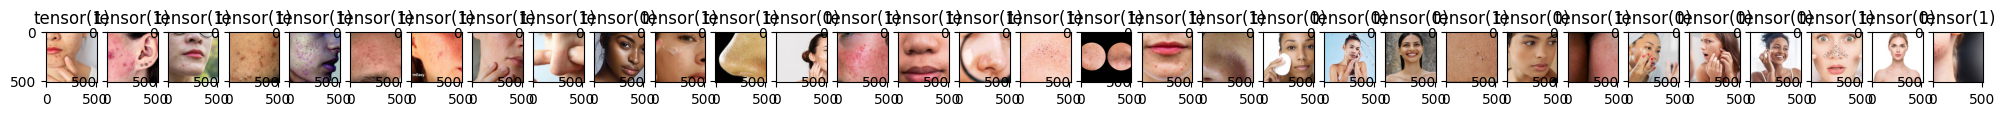

In [4]:
display(data, batch_size=4,max_pic = 5)


In [5]:
model = Model()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
model.train_model(10 ,train_loader,optimizer,criterion)

0/10: 

100%|█████████████████████████| 8/8 [00:24<00:00,  3.04s/it]


0/10: 0.5857611335813999
1/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.42s/it]


1/10: 0.40201542526483536
2/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.41s/it]


2/10: 0.26080987975001335
3/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.40s/it]


3/10: 0.20287877321243286
4/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.41s/it]


4/10: 0.1969283651560545
5/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.40s/it]


5/10: 0.15537194535136223
6/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.41s/it]


6/10: 0.132488414645195
7/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.40s/it]


7/10: 0.07687924616038799
8/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.41s/it]


8/10: 0.05536337569355965
9/10: 

100%|█████████████████████████| 8/8 [00:19<00:00,  2.41s/it]

9/10: 0.06836001854389906


([0.5857611335813999,
  0.40201542526483536,
  0.26080987975001335,
  0.20287877321243286,
  0.1969283651560545,
  0.15537194535136223,
  0.132488414645195,
  0.07687924616038799,
  0.05536337569355965,
  0.06836001854389906],
 [])

In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
images = [cv2.cvtColor(cv2.imread(os.path.join('_Data','test',file)), cv2.COLOR_BGR2RGB) for file in os.listdir(os.path.join('_Data','test')) if file.endswith(('.jpg', '.jpeg', '.png'))]
batch = torch.stack([transforms(image) for image in images])
batch= batch.to(device)

c:\Users\chara\anaconda3\envs\torch\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [39]:
output = model.forward(batch)
print(output)

tensor([9.9214e-01, 2.3717e-04, 9.7500e-01, 9.5168e-01, 7.1814e-01, 9.7297e-01,
        4.4196e-03], device='cuda:0', grad_fn=<SqueezeBackward1>)


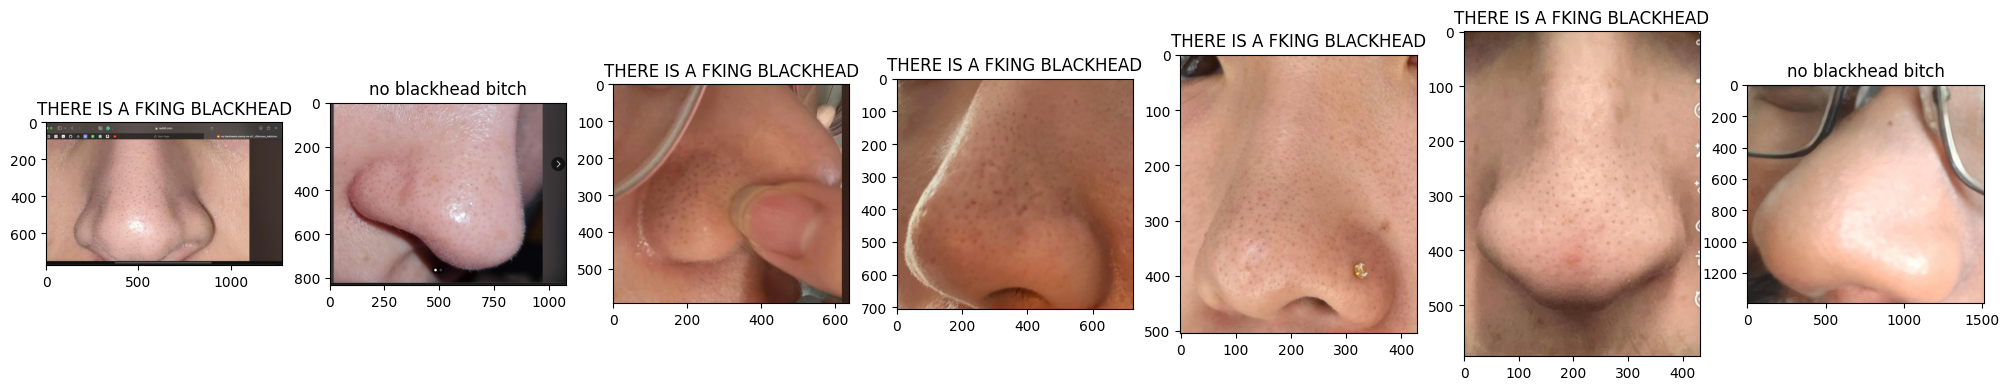

In [43]:
fig, axs = plt.subplots(1,max(len(images),5),figsize=(25, 5))
for i in range(max(len(images),5)):
    axs[i].imshow(images[i])
    if output[i] > 0.5:
        axs[i].set_title(f'THERE IS A FKING BLACKHEAD')
    else:
        axs[i].set_title(f'no blackhead bitch')

In [41]:
for out in output:
    if out > 0.5:
        print(f'THERE IS A FKING BLACKHEAD')
    else:
        print(f'no blackhead bitch')

THERE IS A FKING BLACKHEAD
no blackhead bitch
THERE IS A FKING BLACKHEAD
THERE IS A FKING BLACKHEAD
THERE IS A FKING BLACKHEAD
THERE IS A FKING BLACKHEAD
no blackhead bitch


In [44]:
torch.save(model.state_dict(), 'model_v1.pth')